In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
pd.set_option('max_columns', 100)

import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer


import gensim
import nltk
from gensim.models import phrases, word2vec


from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist
from sklearn.neighbors import KDTree;

In [4]:
pd.options.display.max_colwidth = 1000

In [3]:
apps = pd.read_csv("C:/Users/divya/Downloads/shopify/apps.csv")
apps_cat = pd.read_csv("C:/Users/divya/Downloads/shopify/apps_categories.csv")
cat = pd.read_csv("C:/Users/divya/Downloads/shopify/categories.csv")
benefits = pd.read_csv("C:/Users/divya/Downloads/shopify/key_benefits.csv")
pricing = pd.read_csv("C:/Users/divya/Downloads/shopify/pricing_plan_features.csv")
reviews = pd.read_csv("C:/Users/divya/Downloads/shopify/reviews.csv")

C:\Users\divya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
apps.shape, apps_cat.shape, cat.shape, benefits.shape, pricing.shape, reviews.shape

((3547, 12), (5383, 2), (12, 2), (9552, 3), (16275, 3), (355534, 8))

In [ ]:
apps[apps['id']=='362742fe-7379-4509-87d5-ee80c0a17682'].head()

In [6]:
apps_cat[apps_cat['app_id']=='362742fe-7379-4509-87d5-ee80c0a17682']

,app_id,category_id
3395,362742fe-7379-4509-87d5-ee80c0a17682,c3f9db73c29bc33607778f9935c3c4dc
3396,362742fe-7379-4509-87d5-ee80c0a17682,c769c2bd15500dd906102d9be97fdceb
3397,362742fe-7379-4509-87d5-ee80c0a17682,5eb4e29e50e3f178acc614236ed107f4
3398,362742fe-7379-4509-87d5-ee80c0a17682,30ea2315e910c5e5335de42d5e87dca5
3401,362742fe-7379-4509-87d5-ee80c0a17682,64430ad2835be8ad60c59e7d44e4b0b1


In [7]:
cat[cat['id'].isin(apps_cat[apps_cat['app_id']=='362742fe-7379-4509-87d5-ee80c0a17682'].category_id)]

,id,title
0,c3f9db73c29bc33607778f9935c3c4dc,Store design
3,c769c2bd15500dd906102d9be97fdceb,Marketing
4,5eb4e29e50e3f178acc614236ed107f4,Sales and conversion optimization
7,30ea2315e910c5e5335de42d5e87dca5,Orders and shipping
8,64430ad2835be8ad60c59e7d44e4b0b1,Customer support


In [8]:
benefits[benefits['app_id']=='362742fe-7379-4509-87d5-ee80c0a17682']

,app_id,title,description
5838,362742fe-7379-4509-87d5-ee80c0a17682,Gift Cards on Every Plan,"Enable customers to send branded Gift Cards & Store Credit directly to recipients, and use it for Loyalty Programs, schedule Gift Cards"
5839,362742fe-7379-4509-87d5-ee80c0a17682,Rewards and Loyalty Programs,"Use WorkFlow - the first automated Rewards, Store Credit & Loyalty program. Incentivize Rewards & increase Loyalty using rules you set up"
5840,362742fe-7379-4509-87d5-ee80c0a17682,Bulk Store Credit & Rewards,"Create bulk codes and store credit to use on Marketing, Rewards & Loyalty Program Email Campaigns. Offer Physical cards to increase ROI"


In [9]:
reviews[reviews['app_id']=='362742fe-7379-4509-87d5-ee80c0a17682'].head(2)

,app_id,author,rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at
135207,362742fe-7379-4509-87d5-ee80c0a17682,La Costa Organic Jewelry,5,"December 3, 2019","I really like this app, I had a problem when selecting the images that i wanted but the customer service was ""EXCELLENT"" and my problem was solved. I really fin easy to use this app",0,NaN,NaN
135221,362742fe-7379-4509-87d5-ee80c0a17682,"N-STAR CO.,LTD",5,"December 3, 2019","I highly recommend this app if you are planning to increase your returning and loyalty customers. I've tried out many rewards & loyalty apps but their conditions are too complicate and limited. But this Rise app is super easy to set yourself very easily and if it's complicated, their support team is always ready to help. They'll do everything for you to reach your goals. \nI love this app and encourage you to use this Rise app not only for online store but you can also use for physical store...",0,NaN,NaN


# Getting Category Description

In [10]:
#Add category desc to the df
apps_and_cat = apps.merge(apps_cat, how='left',left_on='id', right_on='app_id')
del apps_and_cat['id']

apps_cat_desc = apps_and_cat.merge(cat, how='left', left_on='category_id', right_on='id')
del apps_cat_desc['id']
apps_cat_desc = apps_cat_desc.rename(columns={'title_x':'app_title','title_y':'cat_desc'})
apps_cat_desc.shape

(5383, 14)

In [11]:
del apps_cat_desc['developer_link'], apps_cat_desc['description_raw'],apps_cat_desc['url'], apps_cat_desc['icon']#, apps_cat_desc['category_id']

In [12]:
apps_cat_desc[apps_cat_desc['app_id']=='362742fe-7379-4509-87d5-ee80c0a17682'].head(2)

,app_title,developer,rating,reviews_count,description,tagline,pricing_hint,app_id,category_id,cat_desc
3397,Rise Gift Card Loyalty Program,Rise.ai,4.9,422,"Must-have for Black Friday: Your ultimate rewards app to get the most out of the upcoming BFCM season. \n Maximize Revenue & Loyalty: \n With Rise.ai, Shopify's first proactive Store Credit & Loyalty Program, you’ll harness the power of Gift Cards to increase revenue & loyalty and to drive new customers to your store. \n Build Your Gift Card Program \n \n Build an enhanced Gift Card and Store Credit program on every Shopify plan, even basic \n Customers can send branded Gift Cards and gift ...","Store Credit, Rewards, Loyalty Programs, Gift Cards & Returns",7-day free trial,362742fe-7379-4509-87d5-ee80c0a17682,c3f9db73c29bc33607778f9935c3c4dc,Store design
3398,Rise Gift Card Loyalty Program,Rise.ai,4.9,422,"Must-have for Black Friday: Your ultimate rewards app to get the most out of the upcoming BFCM season. \n Maximize Revenue & Loyalty: \n With Rise.ai, Shopify's first proactive Store Credit & Loyalty Program, you’ll harness the power of Gift Cards to increase revenue & loyalty and to drive new customers to your store. \n Build Your Gift Card Program \n \n Build an enhanced Gift Card and Store Credit program on every Shopify plan, even basic \n Customers can send branded Gift Cards and gift ...","Store Credit, Rewards, Loyalty Programs, Gift Cards & Returns",7-day free trial,362742fe-7379-4509-87d5-ee80c0a17682,c769c2bd15500dd906102d9be97fdceb,Marketing


# Category Description

In [13]:
apps_cat_desc['whole_rating']=np.round(apps_cat_desc['rating'])

# Percentage of Apps per Category

In [14]:
cat_desc = apps_cat_desc["cat_desc"].value_counts()
#cat_desc = apps_cat_desc[['cat_desc','app_id']].drop_duplicates().groupby('cat_desc').agg({'app_id':'count'}).rename(columns={'app_id':'app_counts'}).reset_index()
trace = go.Pie(labels = cat_desc.index, values = cat_desc.values)

layout = go.Layout(title=go.layout.Title(text="Category Distribution", x=0.5), font=dict(size=14), width=1000, height=500)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Average Num of Reviews per Category

In [15]:
cat_reviews = apps_cat_desc[['cat_desc','reviews_count']].groupby('cat_desc').agg({'reviews_count':'mean'}).reset_index().sort_values(by='reviews_count', ascending=False)
trace = go.Bar(x = cat_reviews.cat_desc, y = cat_reviews.reviews_count)

layout = go.Layout(title=go.layout.Title(text="Average Number of Reviews per Category", x=0.5), font=dict(size=14), width=1000, height=500)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


I am not surprised here. The top categories with the highest number of apps are Marketing, 
Sales and conversion op and store design, which is showing in the average review count as well

In [16]:
apps_cat_desc.head(2)

,app_title,developer,rating,reviews_count,description,tagline,pricing_hint,app_id,category_id,cat_desc,whole_rating
0,ManySingles,Vanessa Company,0.0,0,"It is like having a different online shop for every product! \n ManySingles is a Shopify app that helps you create amazing pages for individual products. The pages created with it look exactly like single-product stores. They have their own header, footer, menus and subpages. \n ManySingles is great for \n \n dropshippers who want to test new products, suitable for single-product stores \n store owners who want to maximize their sales with individual dynamic pages for their products \n \n E...",Create pages that look exactly like single-product stores,5-day free trial,863705e9-45ae-4cd4-abe6-447aa903888d,c3f9db73c29bc33607778f9935c3c4dc,Store design,0.0
1,Real‑Time Shop Insights,Breinify,0.0,0,"About Real-Time Shop Insights \n Realtime Shop Insights allows you to select the types of customer activities you would like to track and visualize them over time. Start tracking customer events with a click and skip the manual setup, data handling, and visualizing. \n\n Realtime Shop Insights simplifies the setup with a user friendly and intuitive click to save time and be efficient. Each type of tracked customer activities is visualized, so that you can analyze the relationship between cu...",Conveniently track customer activities in real-time,NaN,883f7885-706c-4c4b-bce1-c29c119d40f7,c576a841fd4f333a6f074d68e76a1d37,Reporting,0.0


In [17]:
df = apps_cat_desc[['developer','app_id','rating']].drop_duplicates().groupby('developer').agg({'app_id':'count','rating':'mean'}).reset_index().rename(columns={'app_id':'count_apps','rating':'mean_rating'}).sort_values(by='count_apps',ascending=False).head(20)
df.head(2)

import datetime
import plotly.graph_objs as go
from plotly import tools, subplots
import plotly.offline as py

def bar_plot(cnt_srs, color, label):
    trace = go.Bar(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=True,
        name=label,
        marker=dict(
            color=color,
        ),

    )
    return trace

def scatter_plot(cnt_srs, color, label):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=True,
        name=label,
        marker=dict(color=color,),
        yaxis='y2'
    )
    return trace

layout = go.Layout(
    title="Developers by number of apps and average rating",
    legend=dict(x=1.25, y=1),
    barmode='group',
    yaxis2=dict(overlaying='y', anchor='x', side='right')
)


dtrace = []
tdf = df
cnt_srs = tdf["count_apps"]
cnt_srs.index = tdf["developer"]
trace0 = bar_plot(cnt_srs, 'green', 'Number of Apps')
dtrace.append(trace0)

tdf = df
cnt_srs = tdf["mean_rating"]
cnt_srs.index = tdf["developer"]
trace1 = scatter_plot(cnt_srs, 'blue', 'Average Rating')
dtrace.append(trace1)



fig = dict(data=dtrace, layout=layout)
py.iplot(fig)

Elfsight produces highest number of apps but has the lowest average rating. Let us see why is that

In [18]:
df = apps_cat_desc[(apps_cat_desc['developer']=='Elfsight')][['whole_rating','app_id','reviews_count']].groupby('whole_rating').agg({'app_id':'count', 'reviews_count':'mean'}).rename(columns={'app_id':'count_apps', 'reviews_count':'mean_review_count'}).reset_index()
df['mean_review_count']=np.round(df['mean_review_count'])


trace = go.Bar(x = df.whole_rating, y = df.count_apps, showlegend=True, name='App Count')
trace1 = go.Bar(x = df.whole_rating, y = df.mean_review_count, showlegend=True, name='Avg Review Count')

layout = go.Layout(title=go.layout.Title(text="Developer Elfsight", x=0.5), font=dict(size=14), width=1000, height=500)

data = [trace, trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

As can be seen for developer, Elfsight, the highest number of apps are rated 0 with the average review count of 0, 
which means these apps were never reviewed.
Let us find out how many apps were never used?

In [19]:
print(apps[apps['reviews_count']==0].title.nunique() , 'apps have never been reviewed')

659 apps have never been reviewed


# Review

In [20]:
apps_review = apps_cat_desc.merge(reviews, how='left', left_on='app_id', right_on='app_id')
apps_review = apps_review.rename(columns={'rating_x':'app_rating','rating_y':'review_rating'})

In [21]:
apps_review.head(2)

,app_title,developer,app_rating,reviews_count,description,tagline,pricing_hint,app_id,category_id,cat_desc,whole_rating,author,review_rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at
0,ManySingles,Vanessa Company,0.0,0,"It is like having a different online shop for every product! \n ManySingles is a Shopify app that helps you create amazing pages for individual products. The pages created with it look exactly like single-product stores. They have their own header, footer, menus and subpages. \n ManySingles is great for \n \n dropshippers who want to test new products, suitable for single-product stores \n store owners who want to maximize their sales with individual dynamic pages for their products \n \n E...",Create pages that look exactly like single-product stores,5-day free trial,863705e9-45ae-4cd4-abe6-447aa903888d,c3f9db73c29bc33607778f9935c3c4dc,Store design,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Real‑Time Shop Insights,Breinify,0.0,0,"About Real-Time Shop Insights \n Realtime Shop Insights allows you to select the types of customer activities you would like to track and visualize them over time. Start tracking customer events with a click and skip the manual setup, data handling, and visualizing. \n\n Realtime Shop Insights simplifies the setup with a user friendly and intuitive click to save time and be efficient. Each type of tracked customer activities is visualized, so that you can analyze the relationship between cu...",Conveniently track customer activities in real-time,NaN,883f7885-706c-4c4b-bce1-c29c119d40f7,c576a841fd4f333a6f074d68e76a1d37,Reporting,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
apps_review[apps_review['reviews_count']>0].posted_at.min(), apps_review[apps_review['reviews_count']>0].posted_at.max()

('April 1, 2013', 'September 9, 2019')

In [23]:
#apps_review = apps_review[apps_review['reviews_count']>0]
apps_review['normalized_body'] = apps_review['body'].fillna('')

In [24]:
apps_review['normalized_body'][20]

'If you had problem with this app, manager will solved problem fastly. You will not regret with this app. I recommend this app instead of other tabs app. Because other tabs app is just 2 tabs available for free. But this app is more than 3 tabs for free.\nIf you concern tabs app, This app is the best choice.'

# Data Cleaning of Reviews

In [25]:
#remove hyperlinks
apps_review['normalized_body'] = apps_review['normalized_body'].str.replace('http\S+|www.\S+', '', case=False)

In [26]:
import string

#change to lower case
apps_review['normalized_body'] = apps_review['normalized_body'].str.lower()

In [27]:
#remove punctuations
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

apps_review['normalized_body'] = apps_review['normalized_body'].apply(lambda text: remove_punctuation(text))

In [28]:
#remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
apps_review['normalized_body'] = apps_review['normalized_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [29]:
def clean_text(text): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[_A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)|(\d+)|(\&amp)|(\#[A-Za-z0-9]+)", " ", text).split()) 
    
apps_review['normalized_body'] = apps_review['normalized_body'].apply(lambda x: clean_text(x))

In [30]:
%%time
#Stemming and Lemmatization
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} # Pos tag, used Noun, Verb, Adjective and Adverb

# Function for lemmatization using POS tag
def lemmatize_words(text):
    split_text = text.split()
    return " ".join([lemmatizer.lemmatize(word) for word in split_text])

# Passing the function to 'text_rare' and store in 'text_lemma'
apps_review['normalized_body'] = apps_review['normalized_body'].apply(lemmatize_words)

Wall time: 40.8 s


In [31]:
def remove_duplicate_words(text): 
        ''' 
        Utility function to clean text by removing dup words        '''
        words = text.split()
        return (" ".join(sorted(set(text.split()), key=words.index)))
    
apps_review['normalized_body'] = apps_review['normalized_body'].apply(lambda x: remove_duplicate_words(x))

In [32]:
import nltk 
nltk.download('words')
words = set(nltk.corpus.words.words())

def remove_invalid_words(text, words):
    #words = set(nltk.corpus.words.words())
    return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

apps_review['normalized_body'] = apps_review['normalized_body'].apply(lambda x: remove_invalid_words(x, words))

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [33]:
#remove accented chars
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

apps_review['normalized_body'] = apps_review['normalized_body'].apply(lambda x: remove_accented_chars(x))    

In [34]:
rem = pd.Series(' '.join(apps_review['normalized_body']).split()).value_counts().to_frame().reset_index()
rem.rename(columns={0:'counts'},inplace=True)
rm_words_list = rem.sort_values(by='index').head(58)['index'].tolist()
rm_words_list

['!',
 '!!',
 '!!!',
 '!!!!',
 '!!!!!',
 '!!!!!!',
 '!!!!!!!',
 '!!!!!!!!!',
 '!!!!!!!!!!',
 '!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '&',
 '(',
 ')',
 ',',
 ',!!!!!!!!!!!!!!',
 ',!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '.',
 '...',
 '......',
 '.........',
 '..............................',
 '....................................',
 '..........................................',
 '................................................',
 '......................................................',
 '...............................................................',


In [35]:
#rm_words_list = rem.head(14)['index'].tolist()
def remove_words(text):
    rm_words = ' '.join([c for c in text.split() if c not in rm_words_list])
    return rm_words

apps_review['normalized_body'] = apps_review['normalized_body'].apply(lambda x: remove_words(x))

In [36]:
apps_review['body'][123]

'This is a great store locator app! It was easy to setup and easy for my customers to use. I would highly recommend it.'

In [37]:
apps_review['normalized_body'][123]

'great store locator easy setup customer use would highly recommend'

# Identify commonly occuring terms for low rated reviews

In [38]:
df2 = apps_review[(apps_review['review_rating']<apps_review['app_rating'])&(apps_review['reviews_count']>0)]
df2.shape

(89714, 19)

In [39]:
df2 = df2.dropna(subset=['normalized_body'])
negative_reviews_with_low_rating = df2[df2['review_rating'] == 1]
negative_reviews_with_low_rating.shape

(19813, 19)

In [40]:
category_id_df = negative_reviews_with_low_rating[['cat_desc', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'cat_desc']].values)
#id_to_category
labels = negative_reviews_with_low_rating['category_id']

In [41]:

N = 15
fig = subplots.make_subplots(rows=6, cols=2, 
                          shared_yaxes=False, shared_xaxes=False,
                          horizontal_spacing=0.5, print_grid=False, 
                          subplot_titles=["'{0}' term scores".format(entry[0]) for entry in category_to_id.items()])

charts = []


In [42]:
def get_top_n2_words(corpus, n=None):
    vec1 = TfidfVectorizer(sublinear_tf=True, 
                        min_df=1, 
                        norm='l2',
                        ngram_range=(2, 5),  #2,5
                        stop_words='english')
    bag_of_words = vec1.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],  reverse=True)
    return words_freq[:n]

top2=[]
for category, category_id in (category_to_id.items()):
    top2_words = get_top_n2_words(negative_reviews_with_low_rating[negative_reviews_with_low_rating['cat_desc']==category]['normalized_body'], n=10)
    top2_df = pd.DataFrame(top2_words)
    top2_df.columns=["Word", "Freq"]
    #top2_df['cat_desc']=i
    #top2.append(top2_df)
    
    bar_chart = go.Bar(
        name=category, 
        x=top2_df['Freq'], 
        y=top2_df['Word'], 
        orientation='h'
    )
    charts.append(bar_chart)

In [43]:
for number, chart in enumerate(charts):
    row = int(number / 2) + 1
    col = 1 if (number % 2 == 0) else 2
    fig.append_trace(chart, row, col)
    
fig['layout'].update(title='Terms of low rating reviews', 
                     height=1024, width=1024, 
                     margin=go.layout.Margin(l=225, r=225), showlegend=False)
py.iplot(fig)     

doesn't work and bad customer service seems to the issue across different categories for being low rated

# Clustering based on App Description using word2vec 

In [44]:
apps_cat_desc['normalized_desc'] = apps_cat_desc['description'].fillna('')

# Data Cleaning

In [45]:
import string

#change to lower case
apps_cat_desc['normalized_desc'] = apps_cat_desc['normalized_desc'].str.lower()

In [46]:
def clean_text(text): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[_A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)|(\d+)|(\&amp)|(\#[A-Za-z0-9]+)", " ", text).split()) 
    
apps_cat_desc['normalized_desc'] = apps_cat_desc['normalized_desc'].apply(lambda x: clean_text(x))

In [47]:
#remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
apps_cat_desc['normalized_desc'] = apps_cat_desc['normalized_desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [48]:
%%time
#Stemming and Lemmatization
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} # Pos tag, used Noun, Verb, Adjective and Adverb

# Function for lemmatization using POS tag
def lemmatize_words(text):
    split_text = text.split()
    return " ".join([lemmatizer.lemmatize(word) for word in split_text])

# Passing the function to 'text_rare' and store in 'text_lemma'
apps_cat_desc['normalized_desc'] = apps_cat_desc['normalized_desc'].apply(lemmatize_words)

Wall time: 4.32 s


In [49]:
df_desc = apps_cat_desc.copy()
df_desc = df_desc.dropna(subset=['normalized_desc'])
df_desc = df_desc[['normalized_desc']].drop_duplicates()#df2[df2['review_rating'] == 1][['normalized_body']].drop_duplicates()
df_desc.shape

(3547, 1)

In [50]:
# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in df_desc['normalized_desc'].drop_duplicates()]

In [51]:
len(tokenized_corpus)

3547

In [52]:
from collections import Counter

#identify the frequence for each token
def get_word_frequencies(corpus):
  frequencies = Counter()
  for sentence in corpus:
    for word in sentence:
      frequencies[word] += 1
  freq = frequencies.most_common()
  return freq

print("Getting word frequencies")
frequencies = get_word_frequencies(tokenized_corpus)
vocab_size = len(frequencies)
print("Unique words: " + str(vocab_size))  

Getting word frequencies
Unique words: 17750


# Word Embeddings

In [53]:
# Set values for various parameters
feature_size = 500    # Word vector dimensionality  
window_context = 5          # Context window size                                                                                    
min_word_count = 20   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

wv_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

In [54]:
#Create vocabulary
Z = wv_model[wv_model.wv.vocab]

#The pca algorithm is being used to convert data that might be overly dispersed into a set of linear combinations 
#that can more easily be interpreted
sklearn_pca = PCA(n_components = 2, random_state=123)
Y_sklearn = sklearn_pca.fit_transform(Z)

C:\Users\divya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



n_clusters = 3 score_silhouette: 0.33611813
n_clusters = 4 score_silhouette: 0.30205426
n_clusters = 5 score_silhouette: 0.31045172


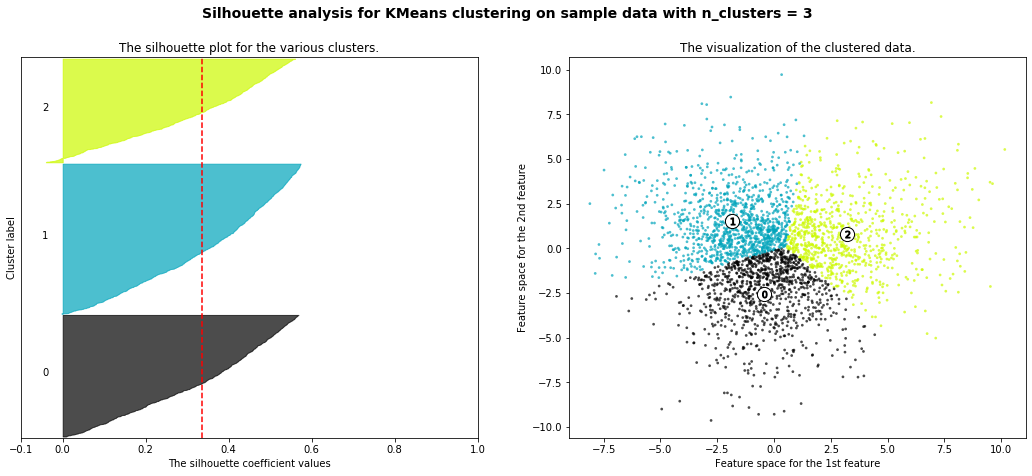

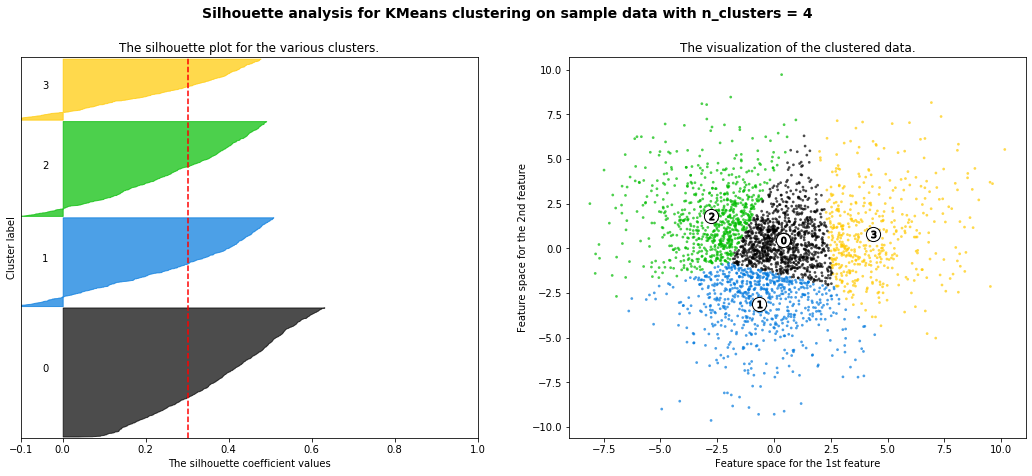

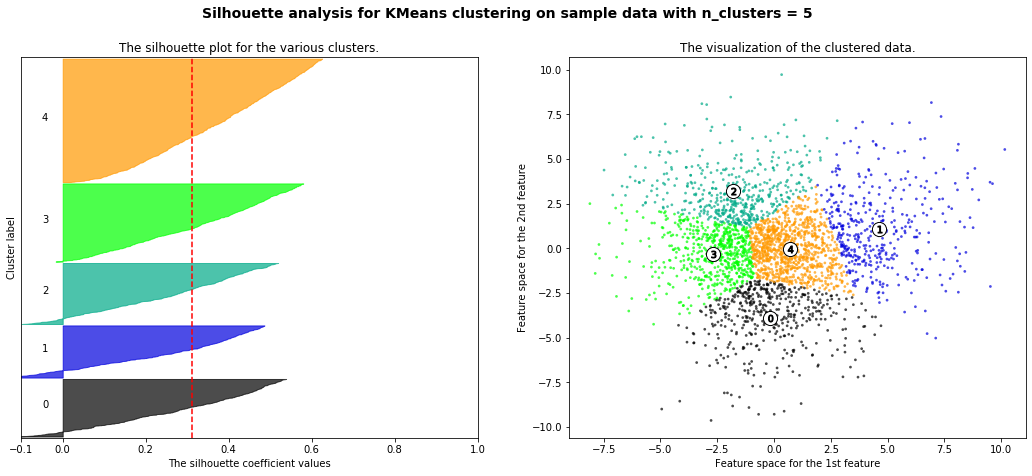

In [55]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Y_sklearn) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Y_sklearn)
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y_sklearn, cluster_labels)
    print("n_clusters =", n_clusters,
          "score_silhouette:", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y_sklearn, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

The red doted line is the mean S. score for the cluster in consideration

For this to be a good value for number of cluster, one should consider the following points 1) The mean value should be as close to 1 as possible 2) The plot of each cluster should be above the mean value as much as possible. Any plot region below the mean value is not desirable. 3) the width of the plot should be as uniform as possible.

Wall time: 76.5 ms


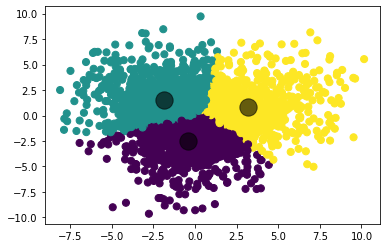

In [56]:
n_cluster = 3

kmeans = KMeans(n_clusters=n_cluster, max_iter=600, algorithm='auto', random_state=10)
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);

In [57]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(Y_sklearn, kmeans.labels_))

0.33611813


In [58]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = wv_model.wv.index2word
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [59]:
dfs = get_top_features_cluster(Z, prediction, 100)

In [60]:
from wordcloud import WordCloud
def display_cloud(cluster_num):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80);
    wordcloud = wc.generate(' '.join([word for word in dfs[cluster_num]['features']]))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')

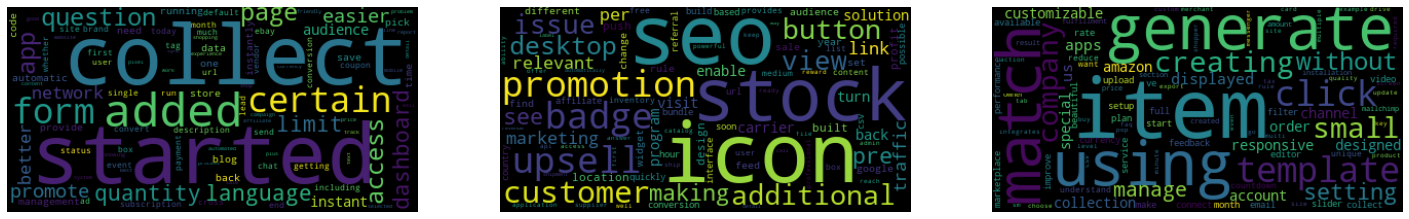

In [61]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (25, 20))
for i in range(1,n_cluster+1):
    plt.subplot(1, 3, i)
    display_cloud(i-1)

In [62]:
def get_word_table(table, key, sim_key='similarity', show_sim = True):
    if show_sim == True:
        return pd.DataFrame(table, columns=[key, sim_key])
    else:
        return pd.DataFrame(table, columns=[key, sim_key])[key]

In [63]:
keys = ['design','conversion','marketing','shipping','support']#,'inventory','productivity','security']#,'trust','revenue'];
tables = [];
for key in keys:
    tables.append(get_word_table(wv_model.wv.similar_by_word(key), key, show_sim=False))

pd.concat(tables, axis=1)

,design,conversion,marketing,shipping,support
0,style,bounce,acquisition,postage,assistance
1,styling,engagement,advertising,ship,u
2,template,ctr,roi,usps,hesitate
3,layout,through,drip,cheapest,team
4,designer,retention,effectiveness,duty,dedicated
5,positioning,aov,growth,domestic,onboarding
6,graphic,greatly,recart,flat,service
7,beautiful,abandonment,sendinblue,delivery,toll
8,appearance,dramatically,klaviyo,shipment,answered
9,stylish,significantly,presence,pickup,contact


# T-SNE word2vec visualization

In [64]:
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in wv_model.similar_by_word(word, topn=30):
        words.append(similar_word)
        embeddings.append(wv_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

C:\Users\divya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).

C:\Users\divya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [65]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

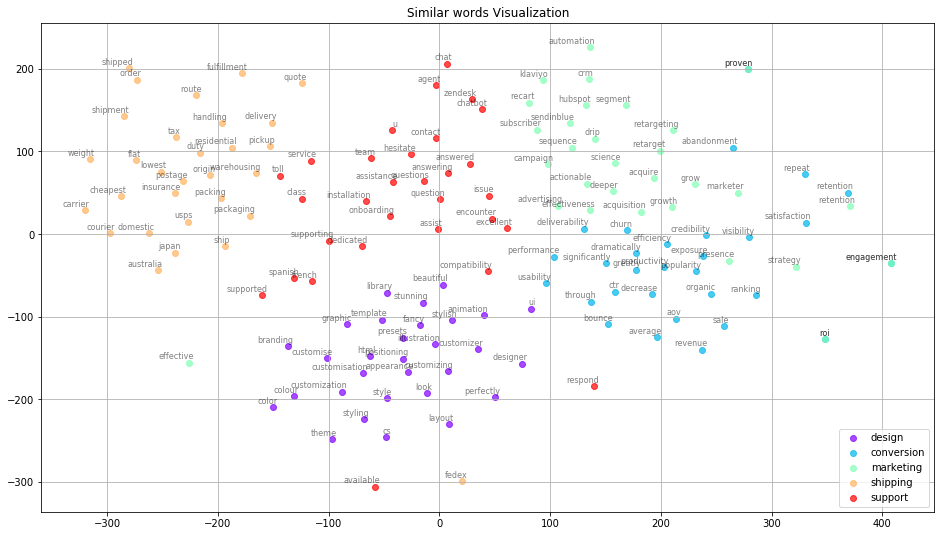

In [66]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words Visualization', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')